In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.ssmrk as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "D05"


In [3]:
# Parameters
abbr = "S21"


In [4]:
preprocess(abbr)
ssmrk_df, pentzer_df = ssmrk.ssmrk_main(abbr)


S21 : Exported merged CSV in data/runs/S21/elec/S21_2022-08-12-17-02-49-VG-ClimbHill_elec_motor_data.csv
Primary topic : mcu_status
S21 : Exported merged CSV in data/runs/S21/merged/S21_2022-08-12-17-02-49-VG-ClimbHill_m.csv
S21 : Exported cut CSV in data/runs/S21/merged/S21_2022-08-12-17-02-49-VG-ClimbHill_mc.csv
Constant columns : 20
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/position/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/warthog_velocity_con

S21 : Exported SSMR kinematics CSV in data/runs/S21/ssmrk/S21_2022-08-12-17-02-49-VG-ClimbHill_ssmrk.csv
S21 : Exported SSMR kinematics CSV in data/runs/S21/ssmrk/S21_2022-08-12-17-02-49-VG-ClimbHill_ssmrk_pentzer.csv


```
axlim = 25
fig, ax = plt.subplots()
ssmrk_df["ICRyL"].plot(ax=ax)
ssmrk_df["ICRyR"].plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)
```

In [5]:
print(ssmrk_df.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'w_z' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py' 'pz'
 'I_L' 'I_R' 'V_L' 'V_R' 'ax_corr' 'ay_corr' 'az_corr' 'P_total' 'v' 'a'
 'P_motion' 'ICRx' 'ICRy' 'vL' 'vR' 'ICRyL' 'ICRyR' 'normal_force' 'Bs'
 'dx_front' 'dx_rear' 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr'
 'dist_asym' 'dist_sym' 'JS_asym' 'JS_sym' 'JG' 'JB' 'mu_asym' 'G_asym'
 'B_asym' 'mu_sym' 'G_sym' 'B_sym']


(-10.0, 10.0)

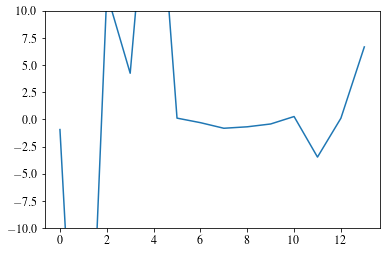

In [6]:
axlim = 10
fig, ax = plt.subplots()
(ssmrk_df.ICRyL - ssmrk_df.ICRyR).plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)


<AxesSubplot:>

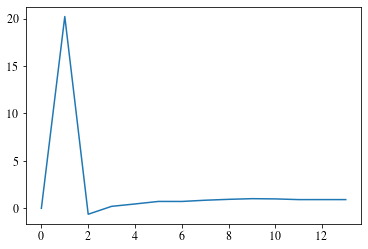

In [7]:
ssmrk_df.B_sym.plot()


In [8]:
mask = ssmrk_df.index >= 10

index = ssmrk_df.index[mask]
power = ssmrk_df.P_total[mask]

mu_asym = ssmrk_df.mu_asym[mask]
G_asym = ssmrk_df.G_asym[mask]
B_asym = ssmrk_df.B_asym[mask]

mu_sym = ssmrk_df.mu_sym[mask]
G_sym = ssmrk_df.G_sym[mask]
B_sym = ssmrk_df.B_sym[mask]


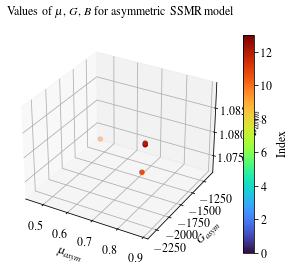

In [9]:
# %matplotlib notebook

cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(ssmrk_df.index), vmax=max(ssmrk_df.index))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(mu_asym, G_asym, B_asym, c=scmap.to_rgba(index))
# ax.set_xlim((-100, 100))
# ax.set_ylim((-10000, 10000))
# ax.set_zlim((-1000, 1000))
ax.set_xlabel("${\mu}_{asym}$")
ax.set_ylabel("${G}_{asym}$")
ax.set_zlabel("${B}_{asym}$")
cb = fig.colorbar(scmap)
cb.ax.set_ylabel("Index")

fig.suptitle("Values of $\mu$, $G$, $B$ for asymmetric SSMR model");


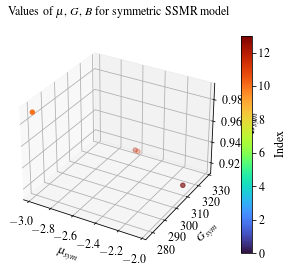

In [10]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(ssmrk_df.index), vmax=max(ssmrk_df.index))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(mu_sym, G_sym, B_sym, c=scmap.to_rgba(index))
# ax.set_xlim((0, 30))
# ax.set_ylim((0, 500))
# ax.set_zlim((-400, 400))
ax.set_xlabel("${\mu}_{sym}$")
ax.set_ylabel("${G}_{sym}$")
ax.set_zlabel("${B}_{sym}$")
cb = fig.colorbar(scmap);
cb.ax.set_ylabel("Index");

fig.suptitle("Values of $\mu$, $G$, $B$ for symmetric SSMR model");

In [11]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"
# pentzfigs = ssmrkgifs / "ssmr_pentz"


fig, subfigs = plt.subplots(ncols=3, nrows=2, figsize = (16,8))
cols = ("mu_asym", "G_asym", "B_asym", "mu_sym", "G_sym", "B_sym")

for col, ax in zip(cols, subfigs.reshape(-1)):
    ssmrk_df[mask][col].plot(ax=ax)
    if col.startswith("mu_"):
        title_txt = f"\{col}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    # if "G_" in col:
    #     ax.set_ylim((-0.5, 0.5))
    if "mu_" in col:
        ax.set_ylim((-1, 1))

    ax.set_xlim(left=50)

    ax.set_title(f"${title_txt}$")

fig.suptitle(f"{abbr} - SSMR model parameters")
fig.tight_layout()
fig.savefig(ssmrkgifs / f"{abbr}_ssmrk_params_naive.jpg", bbox_inches="tight")


In [ ]:
fig, subfigs = plt.subplots(ncols=3, figsize = (16,8))
cols = ("vx", "vy", "vz")

for col, ax in zip(cols, subfigs.reshape(-1)):
    ssmrk_df[mask][col].plot(ax=ax)
    if col.startswith("mu_"):
        title_txt = f"\{col}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    # if "G_" in col:
    #     ax.set_ylim((0, 200))
    # if "mu_" in col:
    #     ax.set_ylim((0, 1))

    # ax.set_xlim((0, 150))

    ax.set_title(f"${title_txt}$")

fig.tight_layout()
fig.savefig(ssmrkgifs / f"{abbr}_ssmrk_speeds_naive.jpg",bbox_inches="tight")

In [ ]:
fig, subfigs = plt.subplots(sharex=True, nrows=3, figsize=(10, 8))
cols = ("mu_asym", "G_asym", "vx")
labs = ("\mu_{{asym}}", "G_{{asym}}", "v_x")
# nmask = ssmrk_df.index > 600 and ssmrk_df.index < 800
for col, lab, ax in zip(cols, labs, subfigs.reshape(-1)):
    # ssmrk_df.iloc[700:750][col].plot(ax=ax)
    ssmrk_df.iloc[:][col].plot(ax=ax)
    ax.set_ylabel(f"${lab}$")
fig.suptitle(f"{abbr} - Comparison of asymmetric parameters with forward speed")
fig.savefig(ssmrkgifs / f"{abbr}_ssmrk_asym_params_vx.jpg", bbox_inches="tight")


In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
pentzer_df.pentz_sym_m.plot(ax=ax1)
pentzer_df.pentz_asym_m.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
ax1.set_ylim((-6,2))
ax2.set_ylim((-6,2))
# ax1.set_xlim(left=0)
fig.supylabel("$\mu$", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $\mu$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_m.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
pentzer_df.pentz_sym_G.plot(ax=ax1)
pentzer_df.pentz_asym_G.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
# ax1.set_xlim(left=0)
fig.supylabel("G [N]", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $G$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_G.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
pentzer_df.pentz_sym_B.plot(ax=ax, label="Symmetric")
pentzer_df.pentz_asym_B.plot(ax=ax, label="Assymetric")
ax.set_ylim((-2,4))
ax.legend()
# ax1.set_xlim(left=0)
fig.supylabel("$B$")
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - comparison of $B$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_B.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time, ssmrk_df.mu_sym)
ax2.plot(pentzer_df.time, pentzer_df.pentz_sym_m)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
ax1.set_ylim((-3,3))
ax2.set_ylim((-3,3))
fig.supylabel("$\mu_{sym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\mu_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_m_sym.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time_rel, ssmrk_df.mu_asym)
ax2.plot(pentzer_df.time_rel, pentzer_df.pentz_asym_m)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
ax1.set_ylim((-6,2))
ax2.set_ylim((-6,2))
fig.supylabel("$\mu_{asym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\mu_{{asym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_m_asym.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time_rel, ssmrk_df.G_sym)
ax2.plot(pentzer_df.time_rel, pentzer_df.pentz_sym_G)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
# ax1.set_ylim((-6,2))
# ax2.set_ylim((-6,2))
fig.supylabel("$G_{sym}$ (N)", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $G_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_G_sym.jpg", bbox_inches="tight")

In [ ]:

fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time_rel, ssmrk_df.G_asym)
ax2.plot(pentzer_df.time_rel, pentzer_df.pentz_asym_G)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
ax1.set_ylim((0,20000))
ax2.set_ylim((0,20000))
fig.supylabel("$G_{asym}$ (N)", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $G_{{asym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_G_asym.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time_rel, ssmrk_df.B_sym)
ax2.plot(pentzer_df.time_rel, pentzer_df.pentz_sym_B)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
# ax1.set_ylim((-6,2))
# ax2.set_ylim((-6,2))
fig.supylabel("$\\beta_{sym}$")
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\\beta_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_B_sym.jpg", bbox_inches="tight")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(ssmrk_df.time_rel, ssmrk_df.B_asym)
ax2.plot(pentzer_df.time_rel, pentzer_df.pentz_asym_B)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
ax1.set_ylim((-2,2))
ax2.set_ylim((-2,2))
fig.supylabel("$\\beta_{asym}$")
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\\beta_{{asym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_comp_B_asym.jpg", bbox_inches="tight")

In [ ]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(pentzer_df.time_rel), vmax=max(pentzer_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

ax.scatter(pentzer_df.pentz_asym_m, pentzer_df.pentz_asym_G, pentzer_df.pentz_asym_B, c=scmap.to_rgba(pentzer_df.time_rel))
# ax.set_xlim((-100, 100))
# ax.set_ylim((-10000, 10000))
# ax.set_zlim((-1000, 1000))
ax.set_xlabel("${\mu}_{asym}$")
ax.set_ylabel("${G}_{asym}$")
ax.set_zlabel("${B}_{asym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$, $B$ for asymmetric SSMR Pentzer model");

In [ ]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(pentzer_df.time_rel), vmax=max(pentzer_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

ax.scatter(pentzer_df.pentz_sym_m, pentzer_df.pentz_sym_G, pentzer_df.pentz_sym_B, c=scmap.to_rgba(pentzer_df.time_rel))
# ax.set_xlim((0, 1))
# ax.set_ylim((-50, 250))
# ax.set_zlim((-1000, 1000))
ax.set_xlabel("${\mu}_{sym}$")
ax.set_ylabel("${G}_{sym}$")
ax.set_zlabel("${B}_{sym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$, $B$ for symmetric SSMR Pentzer model");

In [ ]:
fig, ax = plt.subplots()
pentzer_df.P_err_t.plot(ax=ax, label="Series Params")
pentzer_df.P_err_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.vx, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.vx, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Speed [m/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_vx.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.w_z, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.w_z, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Rotational speed [rad/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_wz.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
pentzer_df.EWMA_t.plot(ax=ax, label="Series Params")
pentzer_df.EWMA_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("EWMA of Power Estimate Error $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - EWMA of Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_PEWMA.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
pentzer_df.estimator_t.plot(ax=ax, label="Series Params")
pentzer_df.estimator_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Cumulative $\Sigma$ of $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Cumulative sum of $EWMA(P_e)$")
fig.savefig(ssmrkgifs / f"{abbr}_PEstimator.jpg", bbox_inches="tight")


In [ ]:
from scipy import integrate
import pandas as pd

pentzer_df.index = pd.RangeIndex(len(pentzer_df.index))
pentzer_df["time_rel"] = pentzer_df["time"] - pentzer_df["time"][0]

power = pentzer_df["P_total"]
rel_time = pentzer_df["time_rel"]
pentzer_df["energy_ws"] = integrate.cumulative_trapezoid(power, rel_time, initial=0)
pentzer_df["energy_wh"] = pentzer_df["energy_ws"] / 3600

In [ ]:
pentzer_df.energy_wh.plot()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.pentz_asym_covm.plot(ax=ax1)
pentzer_df.pentz_asym_covG.plot(ax=ax2)
pentzer_df.pentz_asym_covB.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{asym})$")
ax2.set_ylabel("$\sigma({G}_{asym})$")
ax3.set_ylabel("$\sigma({\\beta}_{asym})$")

fig.supxlabel("Time [s]")


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.pentz_sym_covm.plot(ax=ax1)
pentzer_df.pentz_sym_covG.plot(ax=ax2)
pentzer_df.pentz_sym_covB.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{sym})$")
ax2.set_ylabel("$\sigma({G}_{sym})$")
ax3.set_ylabel("$\sigma({\\beta}_{sym})$")

fig.supxlabel("Time [s]")